In [1]:
pip install requests pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd

# Define the API URL
api_url = "https://spatial.infrastructure.gov.au/server/rest/services/Hosted/Harmonised_Traffic_Counts/FeatureServer/0/query"

# Define the base query parameters
params = {
    'where': '1=1',  # Fetch all data
    'outFields': '*',  # Include all fields
    'f': 'json',  # Output format
    'returnGeometry': 'false',  # Exclude geometry
    'resultOffset': 0,  # Start at the first record
    'resultRecordCount': 2000  # Fetch 2000 records at a time
}

# Initialize variables to store all records
all_records = []

# Fetch data in chunks
while True:
    response = requests.get(api_url, params=params)
    if response.status_code != 200:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        break
    data = response.json()

    # Extract features from the JSON response
    features = data.get("features", [])
    if not features:  # Break loop if no more data
        break

    # Extract attributes and add to the records
    all_records.extend([feature["attributes"] for feature in features])

    # Update the offset for the next query
    params['resultOffset'] += len(features)

    print(f"Fetched {len(features)} records...")

# Convert the data to a pandas DataFrame
df = pd.DataFrame(all_records)

# Save the data to a CSV file
df.to_csv("harmonised_traffic_counts_all_years.csv", index=False)
print("All data saved to harmonised_traffic_counts_all_years.csv")


C:\Users\gouth\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\gouth\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 rec

In [3]:
import requests
import pandas as pd

# Define the API URL
api_url = "https://spatial.infrastructure.gov.au/server/rest/services/Hosted/Harmonised_Traffic_Counts/FeatureServer/0/query"

# Define the base query parameters
params = {
    'where': '1=1',  # Fetch all data
    'outFields': '*',  # Include all fields
    'f': 'json',  # Output format
    'returnGeometry': 'true',  # Include geometry for latitude and longitude
    'geometryPrecision': 6,  # Set precision for geometry coordinates
    'resultOffset': 0,  # Start at the first record
    'resultRecordCount': 2000  # Fetch 2000 records at a time
}

# Initialize variables to store all records
all_records = []

# Fetch data in chunks
while True:
    response = requests.get(api_url, params=params)
    if response.status_code != 200:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        break
    data = response.json()

    # Extract features from the JSON response
    features = data.get("features", [])
    if not features:  # Break loop if no more data
        break

    # Extract attributes and geometry data
    for feature in features:
        record = feature["attributes"]
        # Extract geometry (latitude and longitude)
        geometry = feature.get("geometry", {})
        record["latitude"] = geometry.get("y")
        record["longitude"] = geometry.get("x")
        all_records.append(record)

    # Update the offset for the next query
    params['resultOffset'] += len(features)

    print(f"Fetched {len(features)} records...")

# Convert the data to a pandas DataFrame
df = pd.DataFrame(all_records)

# Save the data to a CSV file
df.to_csv("harmonised_traffic_counts_with_lat_lon.csv", index=False)
print("All data saved to harmonised_traffic_counts_with_lat_lon.csv")


Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 records...
Fetched 2000 rec

In [4]:
# NSW

In [5]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "Traffic_Volume_NSW.csv"  # Replace with your actual dataset filename
df = pd.read_csv(file_path)

# Display first few rows
print("Initial Data Sample:")
display(df.head())

# Step 1: Check for Missing Values
print("\nMissing Values Summary:")
missing_summary = df.isnull().sum()
print(missing_summary)

# Step 2: Drop Unnecessary Columns (Keeping only relevant fields)
columns_to_keep = ['road_name', 'suburb', 'wgs84_latitude', 'wgs84_longitude', 
                   'classification_type', 'year', 'period', 'traffic_count']

df = df[columns_to_keep]



Initial Data Sample:


,the_geom,station_id,road_name,suburb,cardinal_direction_name,classification_type,year,period,traffic_count,wgs84_latitude,wgs84_longitude
0,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,NORTH,ALL VEHICLES,2007,ALL DAYS,11741,-33.852116,151.21077
1,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,NORTH,LIGHT VEHICLES,2007,ALL DAYS,9606,-33.852116,151.21077
2,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,NORTH,HEAVY VEHICLES,2007,ALL DAYS,2135,-33.852116,151.21077
3,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,SOUTH,ALL VEHICLES,2007,ALL DAYS,10743,-33.852116,151.21077
4,0101000020E61000004B1FBAA0BEE66240FD32182312ED...,01001,Bradfield Highway,Milsons Point,SOUTH,LIGHT VEHICLES,2007,ALL DAYS,8609,-33.852116,151.21077



Missing Values Summary:
the_geom                     0
station_id                   0
road_name                  306
suburb                     156
cardinal_direction_name      0
classification_type          0
year                         0
period                       0
traffic_count                0
wgs84_latitude               0
wgs84_longitude              0
dtype: int64


In [6]:
df.head()

,road_name,suburb,wgs84_latitude,wgs84_longitude,classification_type,year,period,traffic_count
0,Bradfield Highway,Milsons Point,-33.852116,151.21077,ALL VEHICLES,2007,ALL DAYS,11741
1,Bradfield Highway,Milsons Point,-33.852116,151.21077,LIGHT VEHICLES,2007,ALL DAYS,9606
2,Bradfield Highway,Milsons Point,-33.852116,151.21077,HEAVY VEHICLES,2007,ALL DAYS,2135
3,Bradfield Highway,Milsons Point,-33.852116,151.21077,ALL VEHICLES,2007,ALL DAYS,10743
4,Bradfield Highway,Milsons Point,-33.852116,151.21077,LIGHT VEHICLES,2007,ALL DAYS,8609


In [7]:
# Step 2: Drop Unnecessary Columns (Keeping only relevant fields)
columns_to_keep = ['road_name', 'suburb', 'wgs84_latitude', 'wgs84_longitude', 
                   'classification_type', 'year', 'period', 'traffic_count']

df = df[columns_to_keep]

# Step 3: Filter for "Light Vehicles" Only
df = df[df['classification_type'] == "LIGHT VEHICLES"]

# Step 4: Keep Only Data for 2021
df = df[df['year'] == 2021]

# Step 5: Keep Only "ALL DAYS" Data
df = df[df['period'].str.contains("ALL DAYS", na=False)]

# Step 6: Ensure Latitude & Longitude are Numeric
df['wgs84_latitude'] = pd.to_numeric(df['wgs84_latitude'], errors='coerce')
df['wgs84_longitude'] = pd.to_numeric(df['wgs84_longitude'], errors='coerce')

# Step 7: Rename Columns for Consistency
df.rename(columns={'wgs84_latitude': 'latitude', 'wgs84_longitude': 'longitude'}, inplace=True)

# Display cleaned dataset sample
print("\nCleaned Data Sample:")
display(df.head())



Cleaned Data Sample:


,road_name,suburb,latitude,longitude,classification_type,year,period,traffic_count
3459,GLEBE POINT,GLEBE,-33.884620,151.192280,LIGHT VEHICLES,2021,ALL DAYS,16983
3462,GLEBE POINT,GLEBE,-33.884620,151.192280,LIGHT VEHICLES,2021,ALL DAYS,17181
3465,GLEBE POINT,GLEBE,-33.884620,151.192280,LIGHT VEHICLES,2021,ALL DAYS,34164
37572,Princes Highway,Bulli,-34.320358,150.895767,LIGHT VEHICLES,2021,ALL DAYS,4743
37575,Princes Highway,Bulli,-34.320358,150.895767,LIGHT VEHICLES,2021,ALL DAYS,1959


In [8]:
# Step 8: Convert Traffic Count to Monthly Data
df['monthly_traffic_count'] = df['traffic_count'] / 12  # Assuming data is yearly

# Step 9: Expand Each Row into 12 Months
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

df_monthly = df.loc[df.index.repeat(12)]  # Repeat each row 12 times (for 12 months)

# ✅ Corrected Month Assignment
df_monthly['month'] = np.tile(months, len(df))  # Ensures proper alignment


In [9]:
df = df_monthly

# Display cleaned dataset sample
print("\nCleaned Data Sample:")
display(df.head())


Cleaned Data Sample:


,road_name,suburb,latitude,longitude,classification_type,year,period,traffic_count,monthly_traffic_count,month
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,16983,1415.25,January
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,16983,1415.25,February
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,16983,1415.25,March
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,16983,1415.25,April
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,16983,1415.25,May


In [10]:
# Step 10: Drop the 'traffic_count' column (original yearly count)
df.drop(columns=['traffic_count'], inplace=True)

# Step 11: Rename 'monthly_traffic_count' to 'traffic_count'
df.rename(columns={'monthly_traffic_count': 'traffic_count'}, inplace=True)

# Display the updated dataset sample
print("\nUpdated Dataset Sample After Column Rename:")
display(df.head())


Updated Dataset Sample After Column Rename:


,road_name,suburb,latitude,longitude,classification_type,year,period,traffic_count,month
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,1415.25,January
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,1415.25,February
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,1415.25,March
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,1415.25,April
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,LIGHT VEHICLES,2021,ALL DAYS,1415.25,May


In [11]:
# Step 12: Drop the 'traffic_count' column (original yearly count)
df.drop(columns=['classification_type'], inplace=True)


In [12]:
# Display the updated dataset sample
print("\nUpdated Dataset Sample After Column Rename:")
display(df.head())

# Save the updated dataset
df.to_csv("Traffic_Volume_NSW_Processed.csv", index=False)
print("\nFinal dataset saved as Traffic_Volume_NSW_Processed.csv")


Updated Dataset Sample After Column Rename:


,road_name,suburb,latitude,longitude,year,period,traffic_count,month
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,2021,ALL DAYS,1415.25,January
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,2021,ALL DAYS,1415.25,February
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,2021,ALL DAYS,1415.25,March
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,2021,ALL DAYS,1415.25,April
3459,GLEBE POINT,GLEBE,-33.88462,151.19228,2021,ALL DAYS,1415.25,May



Final dataset saved as Traffic_Volume_NSW_Processed.csv


In [13]:
#VIC

In [14]:
import pandas as pd

# Load dataset
file_path = "Traffic_Volume_VIC.csv"  # Update with actual file path
df1 = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 road_name    12
dtype: int64


In [15]:
import json
import pandas as pd

# Load the GeoJSON file
geojson_path = "Traffic_Volume.geojson"  # Update with actual file path
with open(geojson_path, "r") as file:
    geojson_data = json.load(file)

# Extract OBJECTID_1, latitude, and longitude
geo_records = []
for feature in geojson_data["features"]:
    object_id = feature["properties"]["OBJECTID_1"]
    
    # Extract first coordinate from "geometry" (assuming LineString)
    if "geometry" in feature and feature["geometry"]["type"] == "LineString":
        lon, lat = feature["geometry"]["coordinates"][0]  # First point in LineString
        geo_records.append({"OBJECTID_1": object_id, "latitude": lat, "longitude": lon})

# Convert extracted data to a DataFrame
gdf = pd.DataFrame(geo_records)

In [16]:
# Merge the two datasets using OBJECTID_1
merged_df = df1.merge(gdf, on="OBJECTID_1", how="left")

# Check for missing values
print("Missing lat/lon after merging:", merged_df[merged_df['latitude'].isna()].shape[0])


Missing lat/lon after merging: 8


In [17]:
missing_ids = df1[~df1["OBJECTID_1"].isin(gdf["OBJECTID_1"])]
print("Missing OBJECTID_1 values:", missing_ids["OBJECTID_1"].unique())


Missing OBJECTID_1 values: [  122  2044  5902  8894 10535 12481 12509 14310]


In [18]:
df1 = merged_df

In [19]:
# Define columns to keep
columns_to_keep = [
    "LGA_SHORT_NM", "DECLARED_ROAD_NM", "ALLVEHS_AADT", 
    "TWO_WAY_AADT", "latitude", "longitude", "YR"
]

# Drop all other columns
df_cleaned = df1[columns_to_keep]

df1 = df_cleaned


In [20]:
# Filter for the latest available year (e.g., 2021)
latest_year = df1['YR'].max()
df1 = df1[df1['YR'] == latest_year]

In [21]:
# Convert annual traffic count to monthly estimates
df1['traffic_count'] = df1['TWO_WAY_AADT'] / 12  # Use only two-way traffic

# Drop original AADT columns after conversion
df1.drop(columns=['ALLVEHS_AADT', 'TWO_WAY_AADT'], inplace=True)

# Repeat each row 12 times to simulate monthly data
df_monthly = df1.loc[df1.index.repeat(12)].reset_index(drop=True)

# Assign month names dynamically
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_monthly['month'] = np.tile(months, len(df1))

print("\nTransformed Monthly Traffic Data:")
display(df_monthly.head())


Transformed Monthly Traffic Data:


,LGA_SHORT_NM,DECLARED_ROAD_NM,latitude,longitude,YR,traffic_count,month
0,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,January
1,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,February
2,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,March
3,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,April
4,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,May


In [22]:
# Rename columns
df_monthly.rename(columns={
    'LGA_SHORT_NM': 'suburb',
    'DECLARED_ROAD_NM': 'road_name',
    'YR': 'year'
}, inplace=True)

print("\nRenamed columns successfully:")
display(df_monthly.head())




Renamed columns successfully:


,suburb,road_name,latitude,longitude,year,traffic_count,month
0,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,January
1,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,February
2,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,March
3,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,April
4,YARRA RANGES,MARYSVILLE-WOODS POINT ROAD,-37.532798,145.837227,2020,3.333333,May


In [23]:
# Save final dataset
df_monthly.to_csv("Traffic_Volume_VIC_Processed.csv", index=False)
print("\nFinal dataset saved as 'Traffic_Volume_VIC_Processed.csv'.")


Final dataset saved as 'Traffic_Volume_VIC_Processed.csv'.


In [24]:
#WA

In [25]:
import pandas as pd

# Load the dataset
file_path = "Traffic_Volume_WA.csv"  # Replace with actual path
df2 = pd.read_csv(file_path)

# Check for missing values
missing_values = df2.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 SAT_SUN              476
PCT_HEAVY_MON_SUN      2
PCT_HEAVY_MON_FRI      2
PCT_HEAVY_SAT_SUN    477
dtype: int64


In [26]:
# Select required columns and rename
df_cleaned = df2[['X', 'Y', 'ROAD_NAME', 'TRAFFIC_YEAR', 'MON_SUN', 'LG_NAME']].copy()
df_cleaned.rename(columns={'X': 'latitude', 'Y': 'longitude', 
                           'ROAD_NAME': 'road_name', 
                           'TRAFFIC_YEAR': 'year', 
                           'MON_SUN': 'traffic_count', 
                           'LG_NAME': 'suburb'}, inplace=True)

# Add a new column for month (assuming daily traffic is an average, multiplying by 30 for monthly estimate)
df_cleaned['traffic_count'] = df_cleaned['traffic_count'] * 30  # Approximate monthly traffic

# Expand each row 12 times to represent each month
df_monthly = df_cleaned.loc[df_cleaned.index.repeat(12)].reset_index(drop=True)

# Assign month names cyclically
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_monthly['month'] = np.tile(months, len(df_cleaned))

In [27]:
df2 = df_monthly

In [28]:
display(df2.head())

,latitude,longitude,road_name,year,traffic_count,suburb,month
0,116.44716,-33.89277,Boyup Brook Kojonup Rd,2023/24,17790,Boyup Brook,January
1,116.44716,-33.89277,Boyup Brook Kojonup Rd,2023/24,17790,Boyup Brook,February
2,116.44716,-33.89277,Boyup Brook Kojonup Rd,2023/24,17790,Boyup Brook,March
3,116.44716,-33.89277,Boyup Brook Kojonup Rd,2023/24,17790,Boyup Brook,April
4,116.44716,-33.89277,Boyup Brook Kojonup Rd,2023/24,17790,Boyup Brook,May


In [29]:
# Save final dataset
df_monthly.to_csv("Traffic_Volume_WA_Processed.csv", index=False)
print("\nFinal dataset saved as 'Traffic_Volume_WA_Processed.csv'.")


Final dataset saved as 'Traffic_Volume_WA_Processed.csv'.


In [30]:
#QLD

In [31]:
import pandas as pd

# Load the dataset
file_path = "Traffic_Volume_QLD.xlsx"  # Replace with actual path
df3 = pd.read_excel(file_path)

# Check for missing values
missing_values = df3.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 MON     48
TUE     48
WED    144
THU    288
FRI     48
SUN     96
dtype: int64


In [32]:
df_cleaned = df3[['LONGITUDE', 'LATITUDE', 'ROAD_NAME', 'DESCRIPTION', 'WEEKDAY_AVERAGE', 'WEEKEND_AVERAGE']].copy()
df_cleaned.rename(columns={
    'LONGITUDE': 'longitude',
    'LATITUDE': 'latitude',
    'ROAD_NAME': 'road_name',
    'DESCRIPTION': 'suburb'
}, inplace=True)

# Convert daily traffic estimates to monthly traffic
df_cleaned['monthly_weekday_traffic'] = df_cleaned['WEEKDAY_AVERAGE'] * 21  # Approx. 21 weekdays in a month
df_cleaned['monthly_weekend_traffic'] = df_cleaned['WEEKEND_AVERAGE'] * 9  # Approx. 9 weekend days in a month

# Compute total monthly traffic count
df_cleaned['traffic_count'] = df_cleaned['monthly_weekday_traffic'] + df_cleaned['monthly_weekend_traffic']

# Drop unnecessary columns
df_cleaned.drop(columns=['WEEKDAY_AVERAGE', 'WEEKEND_AVERAGE', 'monthly_weekday_traffic', 'monthly_weekend_traffic'], inplace=True)

# Repeat each row 12 times (for each month)
df_monthly = df_cleaned.loc[df_cleaned.index.repeat(12)].reset_index(drop=True)

# Assign month names cyclically
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
df_monthly['month'] = np.tile(months, len(df_cleaned))

# Add year column (2023 for all rows)
df_monthly['year'] = 2023

In [33]:
df3 = df_monthly

In [34]:
display(df3.head())

,longitude,latitude,road_name,suburb,traffic_count,month,year
0,153.411081,-27.482689,"""EAST COAST ROAD""",""" Sth of Myora Res- Dunwich""",27,January,2023
1,153.411081,-27.482689,"""EAST COAST ROAD""",""" Sth of Myora Res- Dunwich""",27,February,2023
2,153.411081,-27.482689,"""EAST COAST ROAD""",""" Sth of Myora Res- Dunwich""",27,March,2023
3,153.411081,-27.482689,"""EAST COAST ROAD""",""" Sth of Myora Res- Dunwich""",27,April,2023
4,153.411081,-27.482689,"""EAST COAST ROAD""",""" Sth of Myora Res- Dunwich""",27,May,2023


In [35]:
# Save final dataset
df_monthly.to_csv("Traffic_Volume_QLD_Processed.csv", index=False)
print("\nFinal dataset saved as 'Traffic_Volume_QLD_Processed.csv'.")


Final dataset saved as 'Traffic_Volume_QLD_Processed.csv'.


In [36]:
#Harmomised 

In [37]:
# Load dataset
file_path = "Traffic_Volume_Harmonised.csv"  # Update with your actual file path
df4 = pd.read_csv(file_path)

# Extract Year and Month from 'temporal_period' (e.g., "Oct-17")
df4['year'] = df4['temporal_period'].str[-2:].astype(int) + 2000  # Convert '17' to '2017'
df4['month_str'] = df4['temporal_period'].str[:3]  # Extract first three characters as month abbreviation

# Month Mapping
month_mapping = {
    "Jan": "January", "Feb": "February", "Mar": "March", "Apr": "April",
    "May": "May", "Jun": "June", "Jul": "July", "Aug": "August",
    "Sep": "September", "Oct": "October", "Nov": "November", "Dec": "December"
}
df4['month'] = df4['month_str'].map(month_mapping)

# Identify the latest year for each roadname
df_latest = df4.loc[df4.groupby('roadname')['year'].idxmax()]

# Select only relevant columns
df_latest = df_latest[['latitude', 'longitude', 'roadname', 'month', 'year', 'bins02_class01to02']]

df_latest.rename(columns={'bins02_class01to02': 'traffic_count'}, inplace=True)


df4 = df_latest

C:\Users\gouth\AppData\Local\Temp\ipykernel_24944\792653346.py:3: DtypeWarning: Columns (1,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(file_path)


In [38]:
display(df4.head())

,latitude,longitude,roadname,month,year,traffic_count
81783,-33.9771,151.031,Alfords Point Road,February,2024,105885.0
4206,-33.8737,151.195,Allen Street,January,2024,NaN
21342,-36.4434,148.498,Alpine Way,January,2014,NaN
17556,-34.2025,150.787,Appin Road,January,2022,NaN
123096,-42.8163,147.787,Arthur Highway,January,2021,51512.0


In [39]:
# Check for missing values
missing_values = df4.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 traffic_count    141
dtype: int64


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 81783 to 126118
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       351 non-null    float64
 1   longitude      351 non-null    float64
 2   roadname       351 non-null    object 
 3   month          351 non-null    object 
 4   year           351 non-null    int32  
 5   traffic_count  210 non-null    float64
dtypes: float64(3), int32(1), object(2)
memory usage: 17.8+ KB


In [41]:
# Drop rows where traffic_count is missing
df4.dropna(subset=['traffic_count'], inplace=True)

In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 81783 to 126118
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       210 non-null    float64
 1   longitude      210 non-null    float64
 2   roadname       210 non-null    object 
 3   month          210 non-null    object 
 4   year           210 non-null    int32  
 5   traffic_count  210 non-null    float64
dtypes: float64(3), int32(1), object(2)
memory usage: 10.7+ KB


In [43]:
# Save final dataset
df_monthly.to_csv("Traffic_Volume_Harmonised_Processed.csv", index=False)
print("\nFinal dataset saved as 'Traffic_Volume_Harmonised_Processed.csv'.")


Final dataset saved as 'Traffic_Volume_Harmonised_Processed.csv'.


In [44]:


# Step 2: Import necessary libraries
import geopandas as gpd
import pandas as pd

# Step 3: Load the GeoJSON file
file_path = "Traffic_Volume_SA.geojson"  # Update path if needed
data = gpd.read_file(file_path)

# Step 3: Function to extract first coordinate from MultiLineString or LineString
def extract_first_coordinate(geometry):
    if geometry.geom_type == 'MultiLineString':
        first_line = list(geometry.geoms)[0]
        return first_line.coords[0]
    elif geometry.geom_type == 'LineString':
        return geometry.coords[0]
    else:
        return (None, None)

# Step 4: Apply the function to extract latitude and longitude
data['coordinates'] = data['geometry'].apply(extract_first_coordinate)
data['longitude'] = data['coordinates'].apply(lambda x: x[0])
data['latitude'] = data['coordinates'].apply(lambda x: x[1])

# Step 5: Extract relevant fields
df = pd.DataFrame({
    "latitude": data["latitude"],
    "longitude": data["longitude"],
    "year": data["tesecn_projected_year"],  # Use latest projected year
    "road_name": data["road_no"],
    "traffic_count": data["tesecn_volume"]  # Annual Average Daily Traffic (AADT)
})

# Step 6: Drop rows with missing values
df.dropna(inplace=True)

# Step 7: Convert AADT to Monthly Estimates
df["monthly_traffic_count"] = df["traffic_count"] / 12

# Step 8: Expand dataset to include all months (Repeat each row 12 times)
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

# Repeat each row 12 times
df_monthly = df.loc[df.index.repeat(12)].reset_index(drop=True)

# Assign month names cyclically
df_monthly["month"] = months * len(df)

# Step 9: Rename the traffic count column
df_monthly.rename(columns={"monthly_traffic_count": "traffic_count"}, inplace=True)

In [45]:
# Display the first few rows
df_monthly.head()

,latitude,longitude,year,road_name,traffic_count,traffic_count,month
0,-34.879412,138.512841,2023,05833,21600,1800.0,January
1,-34.879412,138.512841,2023,05833,21600,1800.0,February
2,-34.879412,138.512841,2023,05833,21600,1800.0,March
3,-34.879412,138.512841,2023,05833,21600,1800.0,April
4,-34.879412,138.512841,2023,05833,21600,1800.0,May


In [46]:
# Save final dataset
df_monthly.to_csv("Traffic_Volume_SA_Processed.csv", index=False)
print("\nFinal dataset saved as 'Traffic_Volume_SA_Processed.csv'.")


Final dataset saved as 'Traffic_Volume_SA_Processed.csv'.


In [47]:
#Population

In [48]:
import pandas as pd

# Load the Excel file with multiple sheets
population_file = '32180DS0002_2022-23.xlsx'
sheets = pd.ExcelFile(population_file).sheet_names

# Initialize an empty list to store data from each sheet
dfs = []

# Iterate through each sheet except 'Contents'
for sheet in sheets:
    if sheet != 'Contents':
        # Read the sheet with multi-index headers from rows 5, 6, and 7
        df = pd.read_excel(population_file, sheet_name=sheet, header=[4, 5, 6])

        # Flatten the multi-index columns and remove 'Unnamed' placeholders
        df.columns = [
            ' '.join([str(item) for item in col if 'Unnamed' not in str(item)]).strip()
            for col in df.columns
        ]

        # Display flattened column names for debugging
        print(f"Flattened columns in {sheet}:")
        print(df.columns.tolist())

        # Identify columns dynamically based on partial matches
        lga_code_col = next((col for col in df.columns if 'LGA code' in col), None)
        suburb_col = next((col for col in df.columns if 'Local Government Area' in col), None)
        population_col = next((col for col in df.columns if 'ERP at 30 June 2023' in col), None)
        density_col = next((col for col in df.columns if 'Population density 2023' in col), None)

        # Ensure columns were found
        if not all([lga_code_col, suburb_col, population_col, density_col]):
            print(f"Missing columns in {sheet}, skipping...")
            continue

        # Keep only the required columns
        df = df[[lga_code_col, suburb_col, population_col, density_col]]

        # Rename columns to standardized names
        df.rename(columns={
            lga_code_col: 'lga_code',
            suburb_col: 'suburb',
            population_col: 'population_2023',
            density_col: 'population_density_2023'
        }, inplace=True)

        # Add a 'state' column based on the sheet name
        df['state'] = sheet.replace('Table ', '')

        # Append to the list
        dfs.append(df)

# Combine all states into a single DataFrame
combined_population = pd.concat(dfs, ignore_index=True)

# Display the combined data
print("\nCombined Population Data:")
print(combined_population.head())

# Save the cleaned population dataset
combined_population.to_csv('combined_population_data.csv', index=False)
print("\nFinal dataset saved as 'combined_population_data.csv'.")


Flattened columns in Table 1:
['LGA code', 'Local Government Area', 'ERP at 30 June 2022 no.', 'ERP at 30 June 2023 no.', 'ERP change 2022-23 no.', 'ERP change 2022-23 %', 'Components of population change 2022-23 Natural increase no.', 'Components of population change 2022-23 Net internal migration no.', 'Components of population change 2022-23 Net overseas migration no.', 'Components of population change 2022-23 Area km2', 'Components of population change 2022-23 Population density 2023 persons/km2']
Flattened columns in Table 2:
['LGA code', 'Local Government Area', 'ERP at 30 June 2022 no.', 'ERP at 30 June 2023 no.', 'ERP change 2022-23 no.', 'ERP change 2022-23 %', 'Components of population change 2022-23 Natural increase no.', 'Components of population change 2022-23 Net internal migration no.', 'Components of population change 2022-23 Net overseas migration no.', 'Components of population change 2022-23 Area km2', 'Components of population change 2022-23 Population density 2023 

In [49]:
combined_population.head()

,lga_code,suburb,population_2023,population_density_2023,state
0,10050,Albury,57517.0,188.2,1
1,10180,Armidale,29594.0,3.8,1
2,10250,Ballina,47279.0,97.5,1
3,10300,Balranald,2202.0,0.1,1
4,10470,Bathurst,44612.0,11.7,1


In [50]:
# Check the data type of the 'state' column
print(combined_population['state'].dtype)

# Preview unique values in 'state' to understand the format
print(combined_population['state'].unique())

# If 'state' values are strings, adjust the mapping accordingly
state_mapping = {
    '1': 'New South Wales',
    '2': 'Victoria',
    '3': 'Queensland',
    '4': 'South Australia',
    '5': 'Western Australia'
}

# Apply the mapping and filter out unwanted states
combined_population['state'] = combined_population['state'].map(state_mapping)

# Drop rows where 'state' is NaN (which corresponds to states 6, 7, 8)
combined_population = combined_population.dropna(subset=['state'])

object
['1' '2' '3' '4' '5' '6' '7']


In [51]:
combined_population.head()

,lga_code,suburb,population_2023,population_density_2023,state
0,10050,Albury,57517.0,188.2,New South Wales
1,10180,Armidale,29594.0,3.8,New South Wales
2,10250,Ballina,47279.0,97.5,New South Wales
3,10300,Balranald,2202.0,0.1,New South Wales
4,10470,Bathurst,44612.0,11.7,New South Wales


In [52]:
# Save the cleaned population dataset
combined_population.to_csv('combined_population_data.csv', index=False)
print("\nFinal dataset saved as 'combined_population_data.csv'.")


Final dataset saved as 'combined_population_data.csv'.


In [53]:
#EV Trends

In [54]:
# Load dataset
file_path = "EV_Adoption_Trends.xlsx"  # Update with your actual file path
df4 = pd.read_excel(file_path)

In [55]:
df4.head()

,State,Petrol,Petrol - RSE,Diesel,Diesel - RSE,Electric,Electric - RSE,LPG/CNG/dual fuel/hybrid and other,LPG/CNG/dual fuel/hybrid and other - RSE,Kms,Kms - RSE,Number of vehicles
0,New South Wales,39282,7.44,7003,21.34,23.9,16.95,606,69.47,46915,6.23,4371333
1,Victoria,35787,7.00,7260,25.16,25.2,19.41,2302,41.02,45374,5.65,3979873
2,Queensland,25508,6.54,6184,19.94,10.0,7.33,860,41.05,32562,5.40,2929310
3,South Australia,9365,7.42,2051,18.17,2.1,23.49,505,43.33,11924,5.69,1099449
4,Western Australia,14783,6.68,3345,21.04,5.6,30.77,400,37.27,18533,5.10,1639811


In [56]:
df4.to_csv("EV_Adoption_Trends.csv", index=False)

In [57]:
#Combined Traffic Datasets

In [58]:
import pandas as pd

# Define file paths for each state's traffic data
file_paths = {
    "VIC": "Traffic_Volume_VIC_Processed.csv",
    "NSW": "Traffic_Volume_NSW_Processed.csv",
    "QLD": "Traffic_Volume_QLD_Processed.csv",
    "SA": "Traffic_Volume_SA_Processed.csv",
    "WA": "Traffic_Volume_WA_Processed.csv",
    "Harmonised": "Traffic_Volume_Harmonised_Processed.csv"
}

# Load and print column names for each dataset
for state, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        print(f"State: {state}")
        print("Columns:", df.columns.tolist())
        print("-" * 50)
    except Exception as e:
        print(f"Error loading {state} dataset: {e}")


State: VIC
Columns: ['suburb', 'road_name', 'latitude', 'longitude', 'year', 'traffic_count', 'month']
--------------------------------------------------
State: NSW
Columns: ['road_name', 'suburb', 'latitude', 'longitude', 'year', 'period', 'traffic_count', 'month']
--------------------------------------------------
State: QLD
Columns: ['longitude', 'latitude', 'road_name', 'suburb', 'traffic_count', 'month', 'year']
--------------------------------------------------
State: SA
Columns: ['latitude', 'longitude', 'year', 'road_name', 'traffic_count', 'traffic_count.1', 'month']
--------------------------------------------------
State: WA
Columns: ['latitude', 'longitude', 'road_name', 'year', 'traffic_count', 'suburb', 'month']
--------------------------------------------------
State: Harmonised
Columns: ['longitude', 'latitude', 'road_name', 'suburb', 'traffic_count', 'month', 'year']
--------------------------------------------------


In [59]:
import pandas as pd

# File paths for each state's traffic data
file_paths = {
    "VIC": "Traffic_Volume_VIC_Processed.csv",
    "NSW": "Traffic_Volume_NSW_Processed.csv",
    "QLD": "Traffic_Volume_QLD_Processed.csv",
    "SA": "Traffic_Volume_SA_Processed.csv",
    "WA": "Traffic_Volume_WA_Processed.csv",
    "Harmonised": "Traffic_Volume_Harmonised_Processed.csv"
}

# Desired column structure
standard_columns = ['suburb', 'road_name', 'latitude', 'longitude', 'year', 'month', 'traffic_count']

# List to store cleaned DataFrames
cleaned_dfs = []

# Process each dataset
for state, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        print(f"Processing {state} dataset...")

        # Handle specific issues for each state
        if state == 'NSW':
            df.drop(columns=['period'], inplace=True, errors='ignore')  # Drop 'period' column
        if state == 'SA':
            df.drop(columns=['traffic_count.1'], inplace=True, errors='ignore')  # Drop duplicate column

        # Ensure all required columns are present
        for col in standard_columns:
            if col not in df.columns:
                df[col] = None  # Add missing columns with NaN values for consistency

        # Reorder columns to match the standard structure
        df = df[standard_columns]

        # Append cleaned DataFrame to the list
        cleaned_dfs.append(df)

    except Exception as e:
        print(f"Error processing {state} dataset: {e}")

# Combine all cleaned DataFrames into one
combined_traffic_df = pd.concat(cleaned_dfs, ignore_index=True)

# Display combined dataset info
print("\nCombined Traffic Data:")
print(combined_traffic_df.info())
print(combined_traffic_df.head())

# Save the combined dataset
combined_traffic_df.to_csv("Combined_Traffic_Data.csv", index=False)
print("\nFinal merged dataset saved as 'Combined_Traffic_Data.csv'.")


Processing VIC dataset...
Processing NSW dataset...
Processing QLD dataset...
Processing SA dataset...
Processing WA dataset...
Processing Harmonised dataset...

Combined Traffic Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274624 entries, 0 to 2274623
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   suburb         object 
 1   road_name      object 
 2   latitude       float64
 3   longitude      float64
 4   year           object 
 5   month          object 
 6   traffic_count  float64
dtypes: float64(3), object(4)
memory usage: 121.5+ MB
None
         suburb                    road_name   latitude   longitude  year  \
0  YARRA RANGES  MARYSVILLE-WOODS POINT ROAD -37.532798  145.837227  2020   
1  YARRA RANGES  MARYSVILLE-WOODS POINT ROAD -37.532798  145.837227  2020   
2  YARRA RANGES  MARYSVILLE-WOODS POINT ROAD -37.532798  145.837227  2020   
3  YARRA RANGES  MARYSVILLE-WOODS POINT ROAD -37.532798  145.837227  2020   
4  YARR

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy.spatial import cKDTree
from geopy.distance import geodesic  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

######################################
# 1. Load Data
######################################

TRAFFIC_CSV = 'Combined_Traffic_Data.csv'
POPULATION_CSV = 'geocoded_population_data.csv'
EV_CSV = 'EV_Adoption_Trends.csv'
CHARGERS_CSV = 'charging_stations.csv'

print("🔄 Loading Data...")
traffic_data = pd.read_csv(TRAFFIC_CSV, low_memory=False)
population_data = pd.read_csv(POPULATION_CSV, low_memory=False)
ev_data = pd.read_csv(EV_CSV, low_memory=False)
chargers_data = pd.read_csv(CHARGERS_CSV, low_memory=False)

print("✅ Data Loaded Successfully!")

######################################
# 2. Check & Fix Latitude-Longitude Swaps
######################################

incorrect_rows = traffic_data[
    (traffic_data['latitude'] > 0) & (traffic_data['latitude'] > 100)
]
print(f"⚠️ Rows with possible lat/lon swaps: {len(incorrect_rows)}")

if not incorrect_rows.empty:
    traffic_data.loc[incorrect_rows.index, ['latitude', 'longitude']] = traffic_data.loc[
        incorrect_rows.index, ['longitude', 'latitude']
    ].values
    print("✅ Swapped Latitude and Longitude for Incorrect Rows")

# Drop missing lat/lon
missing_latlon = traffic_data[traffic_data[['latitude', 'longitude']].isna().any(axis=1)]
print(f"📌 Missing Latitude/Longitude Rows: {len(missing_latlon)}")
traffic_data.dropna(subset=['latitude', 'longitude'], inplace=True)

######################################
# 3. Aggregate Traffic Data (Daily Basis)
######################################

traffic_data = traffic_data.groupby(['latitude', 'longitude'], as_index=False).agg({
    'traffic_count': 'sum'
})
traffic_data['traffic_count'] = traffic_data['traffic_count'] / 365

print("\n🛠️ Aggregating Traffic Data by Location (Daily Basis)...")
print(f"✅ Adjusted Traffic Data (Daily Count): {traffic_data.shape}")

######################################
# 4. Calculate Nearest Charger Distance for Each Traffic Point
######################################

print("🛠️ Building KDTree for chargers...")
chargers_coords = chargers_data[['Latitude', 'Longitude']].values
charger_tree = cKDTree(chargers_coords)

def nearest_charger_distance(lat, lon):
    """Finds the nearest charger distance for a given traffic point."""
    if np.isnan(lat) or np.isnan(lon):
        return np.nan  

    dist, idx = charger_tree.query([[lat, lon]], k=1)
    nearest_lat, nearest_lon = chargers_coords[idx[0]]
    haversine_dist = geodesic((lat, lon), (nearest_lat, nearest_lon)).km

    return haversine_dist

print("🔍 Calculating Nearest Charger Distances...")
traffic_data['nearest_charger_distance'] = traffic_data.apply(
    lambda row: nearest_charger_distance(row['latitude'], row['longitude']), axis=1
)

above_5km = (traffic_data['nearest_charger_distance'] > 5).sum()
print(f"🚨 Locations farther than 5 km from a charger: {above_5km} / {len(traffic_data)}")

######################################
# 5. Identify Urban vs Rural Areas
######################################

urban_threshold = 1000  
suburban_threshold = 300  

def classify_area(density):
    if density >= urban_threshold:
        return "Urban"
    elif density >= suburban_threshold:
        return "Suburban"
    else:
        return "Rural"

population_data['area_type'] = population_data['population_density_2023'].apply(classify_area)

print("\n📊 Area Type Distribution:")
print(population_data['area_type'].value_counts())

# Assign area type to traffic points
pop_tree = cKDTree(population_data[['latitude', 'longitude']].values)

def nearest_population(lat, lon):
    """Finds the nearest population data point for a given lat/lon."""
    dist, idx = pop_tree.query([[lat, lon]], k=1)
    return population_data.iloc[idx[0]]['area_type']

traffic_data['area_type'] = traffic_data.apply(
    lambda row: nearest_population(row['latitude'], row['longitude']), axis=1
)

######################################
# 6. Define High-Traffic Demand Areas
######################################

urban_traffic_threshold = 5000  
rural_traffic_threshold = 2500  

traffic_data['high_traffic'] = traffic_data.apply(
    lambda row: row['traffic_count'] >= urban_traffic_threshold if row['area_type'] in ['Urban', 'Suburban']
    else row['traffic_count'] >= rural_traffic_threshold, axis=1
)

######################################
# 7. Define Low-Supply Regions
######################################

def classify_supply(row):
    if row['area_type'] in ['Urban', 'Suburban']:
        return 'Low Supply' if row['nearest_charger_distance'] > 5 else 'Good Supply'
    else:
        return 'Low Supply' if row['nearest_charger_distance'] > 20 else 'Moderate Supply'

traffic_data['low_supply'] = traffic_data.apply(classify_supply, axis=1)

######################################
# 8. Identify Blackspots
######################################

traffic_data['is_blackspot'] = traffic_data.apply(
    lambda row: row['high_traffic'] and row['low_supply'] == 'Low Supply', axis=1
)

######################################
# 9. Verification Checks for Blackspots & Supply
######################################

# Rural High-Traffic, Low-Supply (NOT Blackspots)
rural_high_traffic_low_supply_not_blackspot = traffic_data[
    (traffic_data["high_traffic"] == True) &
    (traffic_data["low_supply"] != "Good Supply") & 
    (traffic_data["is_blackspot"] == False) &
    (traffic_data["area_type"] == "Rural")
]

# Urban High-Traffic Labeled as "Good Supply"
high_traffic_urban_good_supply = traffic_data[
    (traffic_data["high_traffic"] == True) &
    (traffic_data["low_supply"] == "Good Supply") &
    (traffic_data["area_type"] == "Urban")
]

# Urban High-Traffic, Not Blackspots
urban_high_traffic_not_blackspot = traffic_data[
    (traffic_data["high_traffic"] == True) &
    (traffic_data["area_type"] == "Urban") &
    (traffic_data["is_blackspot"] == False)
]

######################################
# 10. Save Data for Further Inspection
######################################

traffic_data.to_csv("processed_traffic_data.csv", index=False)
rural_high_traffic_low_supply_not_blackspot.to_csv("rural_high_traffic_low_supply_not_blackspot.csv", index=False)
high_traffic_urban_good_supply.to_csv("high_traffic_urban_good_supply.csv", index=False)
urban_high_traffic_not_blackspot.to_csv("urban_high_traffic_not_blackspot.csv", index=False)

print("✅ Data Saved for Further Verification!")

######################################
# 11. Final Summary for Review
######################################

print("\n📊 **Final Verification Summary:**")
print(f"✔ Rural High-Traffic, Low-Supply (Not Blackspots): {len(rural_high_traffic_low_supply_not_blackspot)}")
print(f"✔ High-Traffic Urban Locations labeled 'Good Supply': {len(high_traffic_urban_good_supply)}")
print(f"✔ High-Traffic Urban Locations (Not Blackspots): {len(urban_high_traffic_not_blackspot)}")
######################################
# 1. Compute Overlap Between High-Traffic and Low-Supply Locations
######################################

# Extract the true intersection of high-traffic and low-supply locations
high_traffic_low_supply = traffic_data[
    (traffic_data['high_traffic'] == True) & (traffic_data['low_supply'] == 'Low Supply')
]

# Compute intersection count
total_blackspot_criteria = len(high_traffic_low_supply)
identified_blackspots = traffic_data['is_blackspot'].sum()
missing_blackspots = total_blackspot_criteria - identified_blackspots

print(f"\n📊 High Traffic & Low Supply (Should be Blackspots): {total_blackspot_criteria}")
print(f"✅ Identified Blackspots: {identified_blackspots}")
print(f"🚨 Missing Blackspots (Should be blackspots but are NOT classified as such): {missing_blackspots}")

######################################
# 2. Breakdown by Area Type
######################################

# Count how many should be blackspots by area type
blackspot_misclassification = high_traffic_low_supply[~high_traffic_low_supply['is_blackspot']]

blackspot_misclassification_by_area = blackspot_misclassification['area_type'].value_counts()

print("\n📊 Misclassified Blackspots by Area Type:")
print(blackspot_misclassification_by_area)

######################################
# 3. Save the Misclassified Blackspots for Manual Inspection
######################################

blackspot_misclassification.to_csv("potential_blackspots_for_review.csv", index=False)
print("\n✅ Potential Blackspots Saved: potential_blackspots_for_review.csv")


🔄 Loading Data...
✅ Data Loaded Successfully!
⚠️ Rows with possible lat/lon swaps: 36312
✅ Swapped Latitude and Longitude for Incorrect Rows
📌 Missing Latitude/Longitude Rows: 96

🛠️ Aggregating Traffic Data by Location (Daily Basis)...
✅ Adjusted Traffic Data (Daily Count): (14293, 3)
🛠️ Building KDTree for chargers...
🔍 Calculating Nearest Charger Distances...
🚨 Locations farther than 5 km from a charger: 4964 / 14293

📊 Area Type Distribution:
area_type
Rural       394
Urban        79
Suburban     35
Name: count, dtype: int64
✅ Data Saved for Further Verification!

📊 **Final Verification Summary:**
✔ Rural High-Traffic, Low-Supply (Not Blackspots): 1116
✔ High-Traffic Urban Locations labeled 'Good Supply': 1038
✔ High-Traffic Urban Locations (Not Blackspots): 1038

📊 High Traffic & Low Supply (Should be Blackspots): 406
✅ Identified Blackspots: 406
🚨 Missing Blackspots (Should be blackspots but are NOT classified as such): 0

📊 Misclassified Blackspots by Area Type:
Series([], Name:

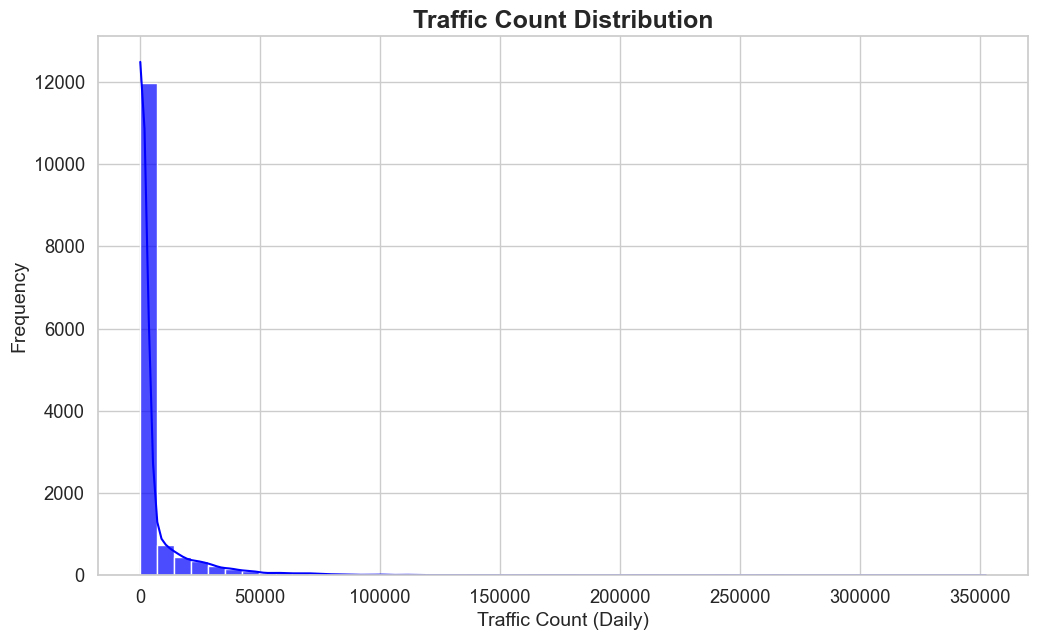

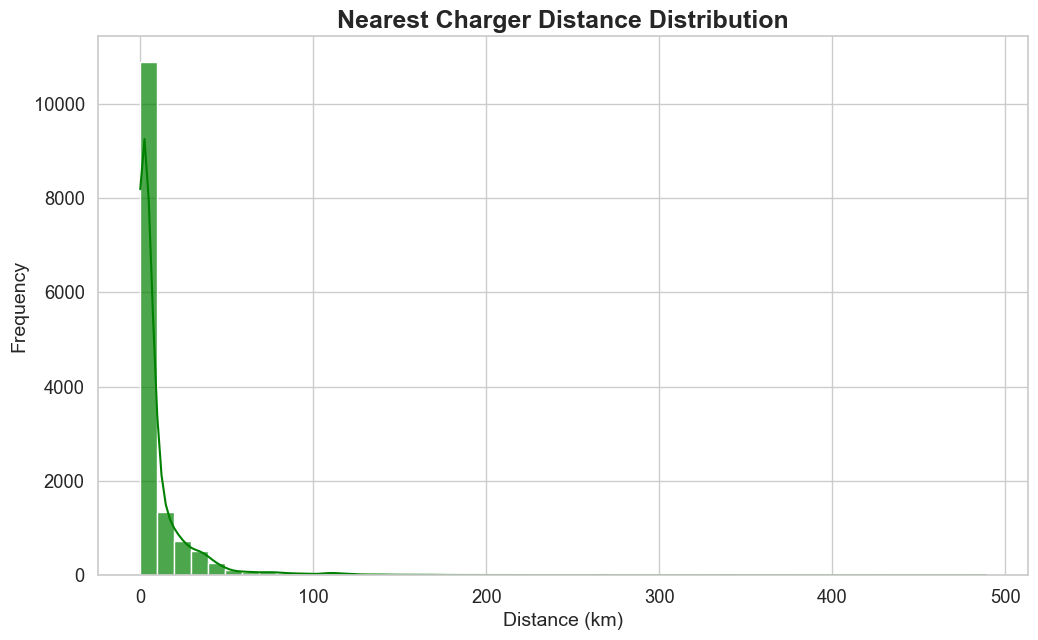

C:\Users\gouth\AppData\Local\Temp\ipykernel_24944\617317114.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_data, x='area_type', y='traffic_count', palette='viridis')


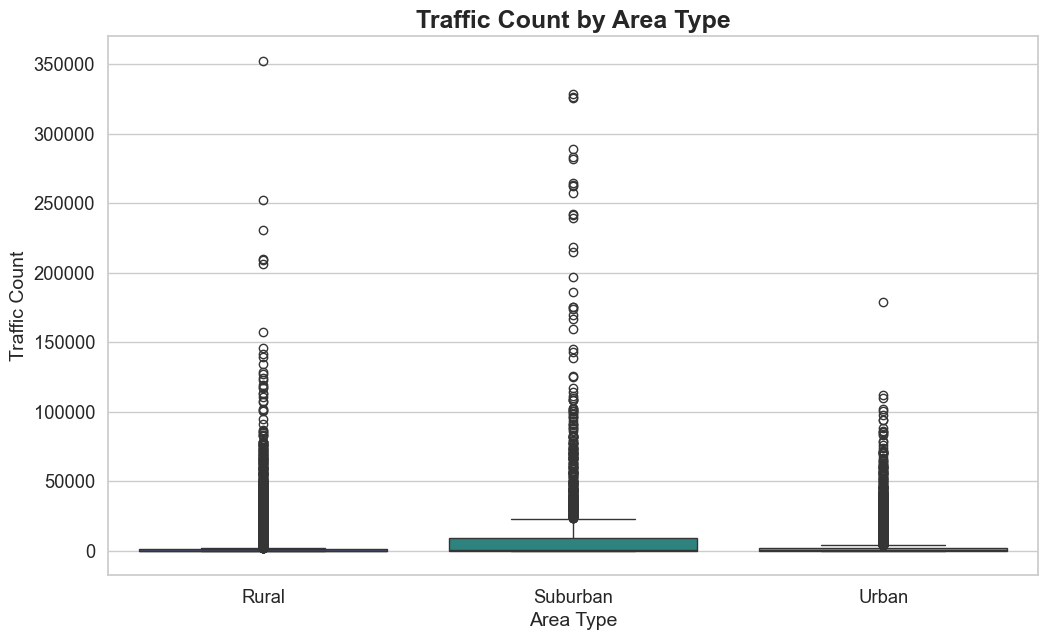

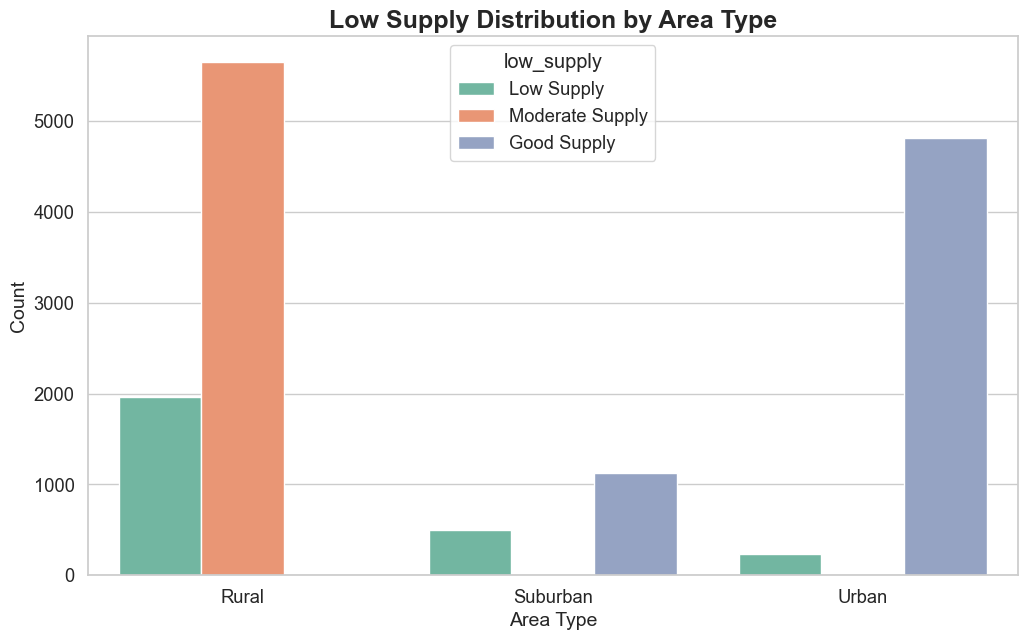

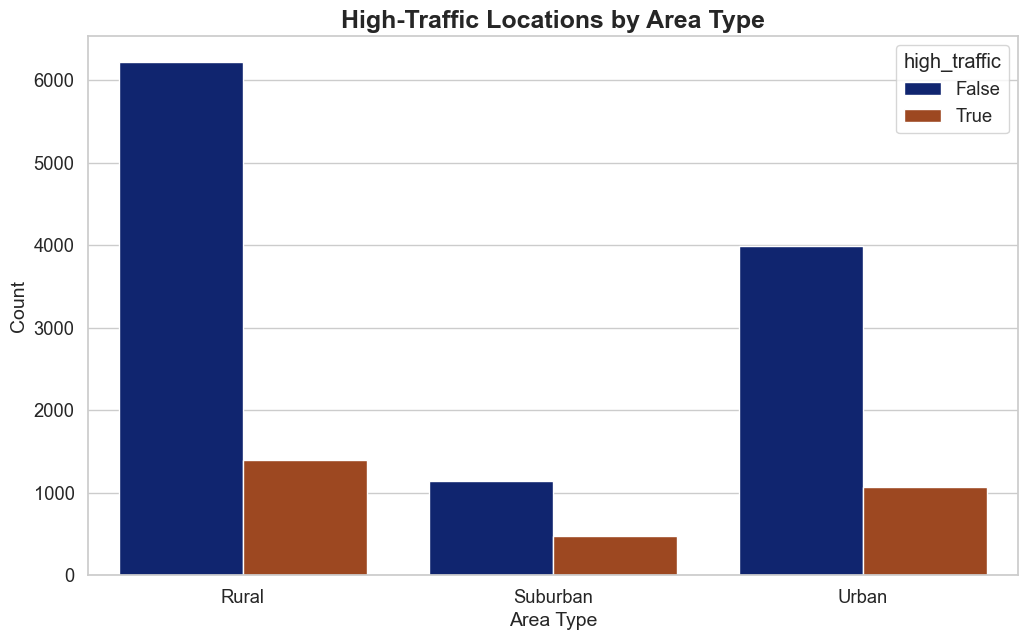

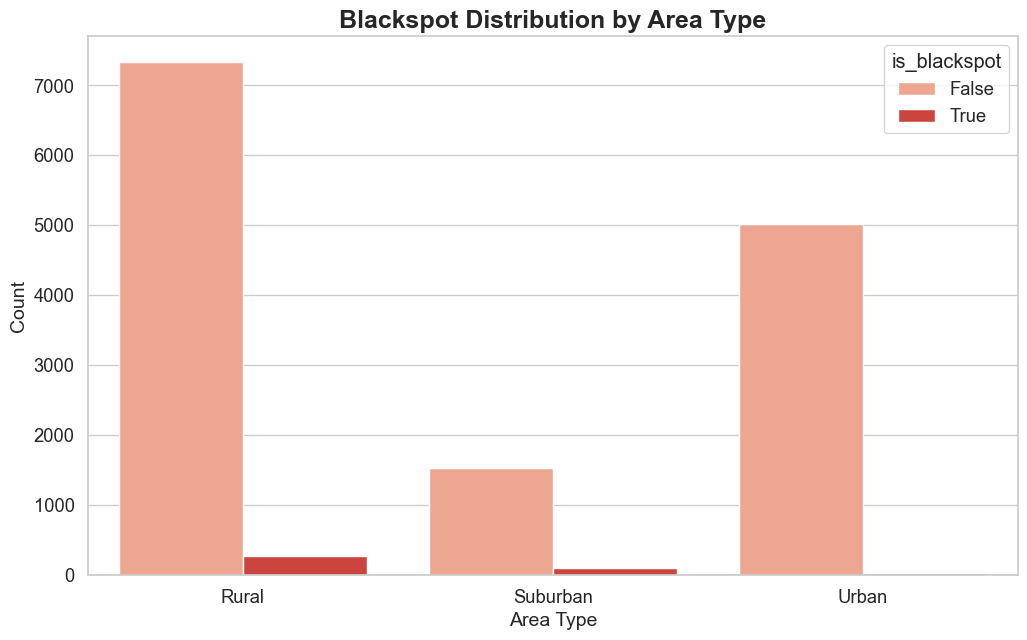

C:\Users\gouth\AppData\Local\Temp\ipykernel_24944\617317114.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blackspots['cluster'] = kmeans.fit_predict(blackspots[['latitude', 'longitude']])


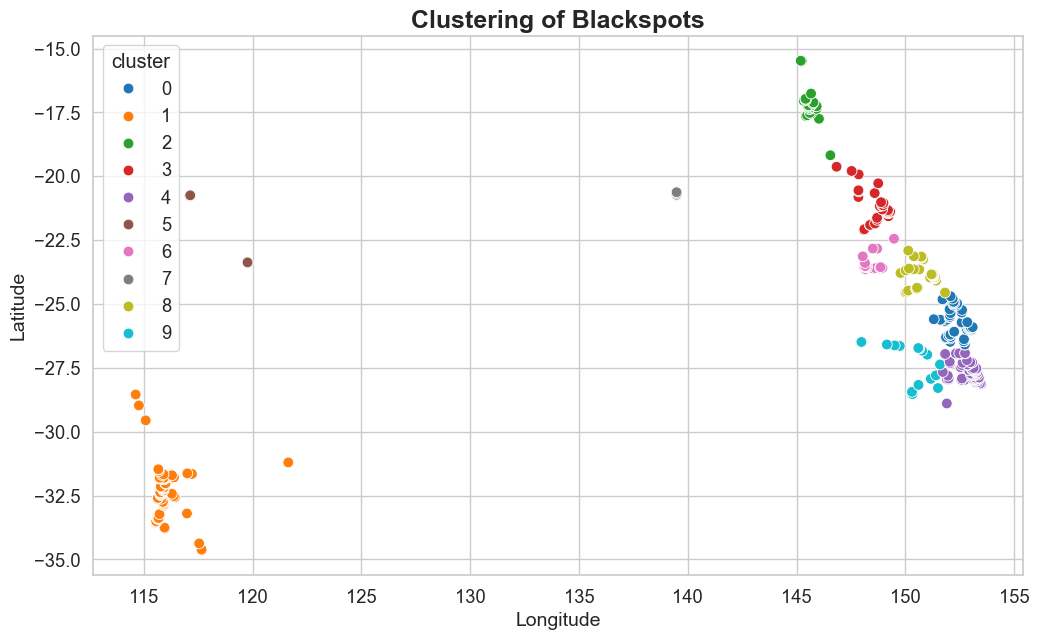

✅ Visualization Completed and Map Displayed.


In [61]:
# 1. Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans
from geopy.distance import geodesic
from IPython.display import display, IFrame

# Enhanced Visual Settings
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Load the dataset
traffic_data = pd.read_csv("processed_traffic_data.csv")
chargers_data = pd.read_csv("charging_stations.csv")

# Basic data cleaning
traffic_data.dropna(subset=['latitude', 'longitude'], inplace=True)

# 2. Exploratory Data Analysis (EDA)

# Traffic Count Distribution
plt.figure(figsize=(12, 7))
sns.histplot(traffic_data['traffic_count'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Traffic Count Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Traffic Count (Daily)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Nearest Charger Distance Distribution
plt.figure(figsize=(12, 7))
sns.histplot(traffic_data['nearest_charger_distance'], bins=50, kde=True, color='green', alpha=0.7)
plt.title('Nearest Charger Distance Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Traffic Count by Area Type
plt.figure(figsize=(12, 7))
sns.boxplot(data=traffic_data, x='area_type', y='traffic_count', palette='viridis')
plt.title('Traffic Count by Area Type', fontsize=18, fontweight='bold')
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Traffic Count', fontsize=14)
plt.show()

# Low Supply Distribution by Area Type
plt.figure(figsize=(12, 7))
sns.countplot(data=traffic_data, x='area_type', hue='low_supply', palette='Set2')
plt.title('Low Supply Distribution by Area Type', fontsize=18, fontweight='bold')
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# High-Traffic Locations by Area Type
plt.figure(figsize=(12, 7))
sns.countplot(data=traffic_data, x='area_type', hue='high_traffic', palette='dark')
plt.title('High-Traffic Locations by Area Type', fontsize=18, fontweight='bold')
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Blackspot Distribution by Area Type
plt.figure(figsize=(12, 7))
sns.countplot(data=traffic_data, x='area_type', hue='is_blackspot', palette='Reds')
plt.title('Blackspot Distribution by Area Type', fontsize=18, fontweight='bold')
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# 3. Advanced Visualizations
# Clustering of Blackspots
blackspots = traffic_data[traffic_data['is_blackspot'] == True]

# K-Means Clustering
kmeans = KMeans(n_clusters=10, random_state=0)
blackspots['cluster'] = kmeans.fit_predict(blackspots[['latitude', 'longitude']])

plt.figure(figsize=(12, 7))
sns.scatterplot(data=blackspots, x='longitude', y='latitude', hue='cluster', palette='tab10', s=60)
plt.title('Clustering of Blackspots', fontsize=18, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()

# 4. Interactive Folium Map
m = folium.Map(location=[-25.2744, 133.7751], zoom_start=5)

# Add Traffic Points
for _, row in traffic_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='blue' if row['is_blackspot'] else 'green',
        fill=True,
        fill_opacity=0.6,
        popup=f"Traffic Count: {row['traffic_count']} | Area: {row['area_type']}"
    ).add_to(m)

# Add High-Traffic Blackspots
for _, row in traffic_data[traffic_data['is_blackspot']].iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='red', icon="warning-sign"),
        popup=f"Blackspot - Traffic: {row['traffic_count']} | Distance to Charger: {row['nearest_charger_distance']} km"
    ).add_to(m)

# Add Charging Stations
for _, row in chargers_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=4,
        color='green',
        fill=True,
        fill_opacity=0.7,
        popup="Charging Station"
    ).add_to(m)

# Heatmap of Traffic Density
heat_data = [[row['latitude'], row['longitude'], row['traffic_count']] for index, row in traffic_data.iterrows()]
HeatMap(heat_data).add_to(m)

# Display the map directly in the notebook
m.save("blackspots_map.html")
display(IFrame("blackspots_map.html", width=800, height=600))

print("✅ Visualization Completed and Map Displayed.")


In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

# 1. Load the processed traffic data
traffic_data = pd.read_csv("processed_traffic_data.csv")

# 2. Feature Engineering: Prepare the data for model training
features = ['latitude', 'longitude', 'traffic_count', 'nearest_charger_distance']
X = traffic_data[features]
y = traffic_data['is_blackspot']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
model_results = {}

# Models to train
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Save the model and results
    model_results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Find the best model based on F1-Score
best_model_name = max(model_results, key=lambda x: model_results[x]['f1'])
best_model = model_results[best_model_name]['model']
print(f"\n✅ Best model: {best_model_name} with F1-Score: {model_results[best_model_name]['f1']:.4f}")

# Save the best model for future use
joblib.dump(best_model, 'best_blackspot_model.pkl')
print("✅ Best model saved as 'best_blackspot_model.pkl'")



Training Random Forest...
Model: Random Forest
Accuracy: 0.9983, Precision: 0.9726, Recall: 0.9595, F1-Score: 0.9660
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2785
        True       0.97      0.96      0.97        74

    accuracy                           1.00      2859
   macro avg       0.99      0.98      0.98      2859
weighted avg       1.00      1.00      1.00      2859


Training Gradient Boosting...
Model: Gradient Boosting
Accuracy: 0.9969, Precision: 0.9452, Recall: 0.9324, F1-Score: 0.9388
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2785
        True       0.95      0.93      0.94        74

    accuracy                           1.00      2859
   macro avg       0.97      0.97      0.97      2859
weighted avg       1.00      1.00      1.00      2859


Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.8727, Precision: 0.1357, Recal

🔄 Loading Processed Data...
✅ Data Loaded Successfully!
🔧 Preprocessing Data...
✅ Data Preprocessing Completed!
🔍 Training Ensemble Model...
✅ Best Parameters: {'gb__learning_rate': 0.1, 'gb__n_estimators': 200, 'rf__max_depth': 20, 'rf__n_estimators': 50}

📊 Evaluating Model...

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2785
        True       0.99      0.95      0.97        74

    accuracy                           1.00      2859
   macro avg       0.99      0.97      0.98      2859
weighted avg       1.00      1.00      1.00      2859


Confusion Matrix:
[[2784    1]
 [   4   70]]

Accuracy: 0.9983

🔄 Cross-Validation...
Cross-Validation F1 Scores: [0.96875    0.98461538 0.93129771 0.9924812  0.97674419]
Mean CV F1 Score: 0.9708
✅ Best model saved as 'best_blackspot_model.pkl'

🌟 Feature Importance:


C:\Users\gouth\AppData\Local\Temp\ipykernel_24944\2584136568.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


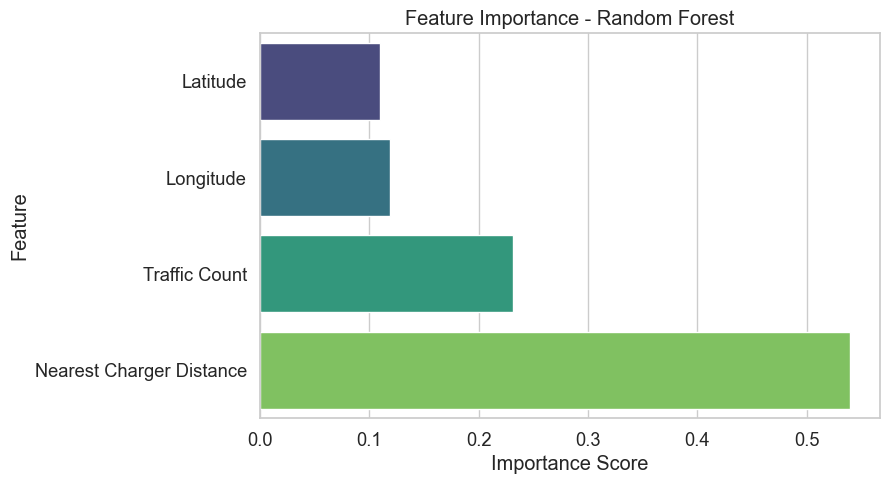


🔁 ROC Curve and AUC...


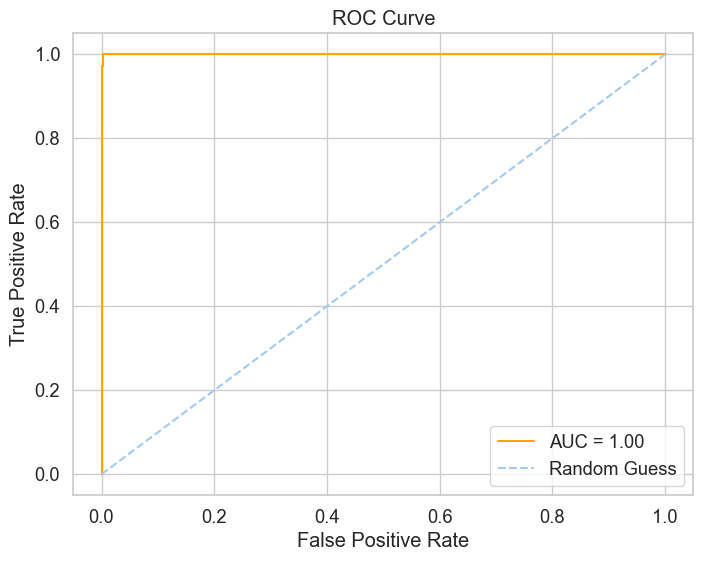


🗺️ Visualizing Predictions...


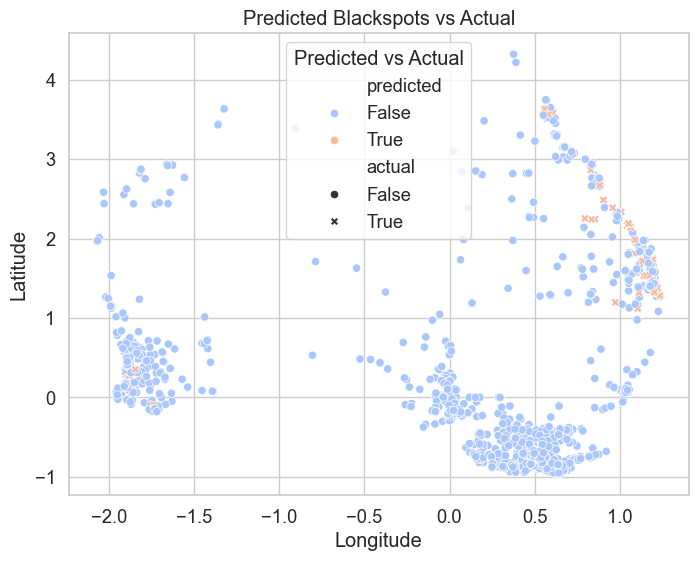


🗺️ Generating Interactive Map...


✅ Interactive Map generated!


In [63]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
import folium
from folium.plugins import HeatMap
from IPython.display import display, IFrame

# 2. Load the Processed Traffic Data
print("🔄 Loading Processed Data...")
traffic_data = pd.read_csv("processed_traffic_data.csv")
print("✅ Data Loaded Successfully!")

# 3. Preprocessing Data
print("🔧 Preprocessing Data...")
traffic_data.dropna(subset=['latitude', 'longitude'], inplace=True)
X = traffic_data[['latitude', 'longitude', 'traffic_count', 'nearest_charger_distance']]
y = traffic_data['is_blackspot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("✅ Data Preprocessing Completed!")

# 4. Train Ensemble Model
print("🔍 Training Ensemble Model...")
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [10, 20],
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.1, 0.05]
}

ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')
grid_search = GridSearchCV(ensemble, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"✅ Best Parameters: {grid_search.best_params_}")

# 5. Model Evaluation
print("\n📊 Evaluating Model...")
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = np.mean(y_pred == y_test)

print(f"\nClassification Report:\n{report}")
print(f"\nConfusion Matrix:\n{cm}")
print(f"\nAccuracy: {accuracy:.4f}")

# Cross-Validation
print("\n🔄 Cross-Validation...")
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.4f}")

# Save the Best Model
joblib.dump(best_model, "best_blackspot_model.pkl")
print("✅ Best model saved as 'best_blackspot_model.pkl'")

# 6. Feature Importance
print("\n🌟 Feature Importance:")
feature_names = ['Latitude', 'Longitude', 'Traffic Count', 'Nearest Charger Distance']
feature_importances = best_model.named_estimators_['rf'].feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# 7. ROC Curve
print("\n🔁 ROC Curve and AUC...")
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 8. Visualizing Predictions
print("\n🗺️ Visualizing Predictions...")
test_data = X_test.copy()
test_data = pd.DataFrame(test_data, columns=feature_names)
test_data['predicted'] = y_pred
test_data['actual'] = y_test.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_data, x='Longitude', y='Latitude', hue='predicted', style='actual', palette='coolwarm')
plt.title("Predicted Blackspots vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Predicted vs Actual")
plt.show()

# 9. Interactive Map with Folium
print("\n🗺️ Generating Interactive Map...")
m = folium.Map(location=[-25.2744, 133.7751], zoom_start=5)

# Add Blackspots and Non-Blackspots
for _, row in traffic_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red' if row['is_blackspot'] else 'green',
        fill=True,
        fill_opacity=0.6,
        popup=f"Traffic Count: {row['traffic_count']}"
    ).add_to(m)

# Heatmap of Blackspot Predictions
heat_data = [[row['Latitude'], row['Longitude'], 1] for index, row in test_data[test_data['predicted'] == 1].iterrows()]
HeatMap(heat_data).add_to(m)

# Save and display map in the notebook
map_filename = 'blackspots_map.html'
m.save(map_filename)
display(IFrame(map_filename, width=800, height=600))

print("✅ Interactive Map generated!")
